In [1]:
import os.path as path
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras import backend as K

Using TensorFlow backend.


In [2]:
NUMBER = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

CAPTCHA_LEN = 4
CAPTCHA_HEIGHT = 60
CAPTCHA_WIDTH = 160

TRAIN_DATA_DIR = './data/train/'

In [3]:
images = []
labels = []

for file_path in glob.glob(path.join(TRAIN_DATA_DIR, "*.png"))[0:100]:
    label = path.splitext(path.basename(file_path))[0]
    labels.append(label)
    image = np.array(Image.open(file_path))
    images.append(image)
    
images = np.array(images)
print("images.shape = {}".format(images.shape))

images.shape = (100, 60, 160, 3)


In [4]:
def show_images(images, labels, gray_scale=False):
    plt.figure()
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.tight_layout()
        if gray_scale:
            plt.imshow(images[i], cmap="Greys")
        else:
            plt.imshow(images[i])
        plt.title(labels[i])
        plt.xticks([])
        plt.yticks([])

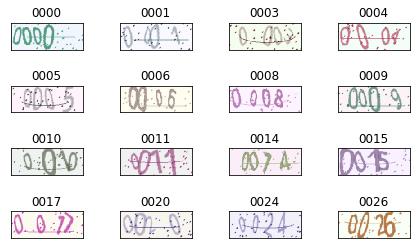

In [5]:
show_images(images, labels)

In [6]:
def rgb2gray(image):
    return np.dot(image[...,:3], [0.299, 0.587, 0.114])

gray_images.shape = (100, 60, 160)
[[244.531 244.531 244.531 ... 244.531 244.531 244.531]
 [244.531 244.531 244.531 ... 244.531 244.531 244.531]
 [244.531 244.531 244.531 ... 244.531 244.531 244.531]
 ...
 [244.531 244.531 244.531 ... 244.531 244.531 244.531]
 [244.531 244.531 244.531 ... 244.531 244.531 244.531]
 [244.531 244.531 244.531 ... 244.531 244.531 244.531]]


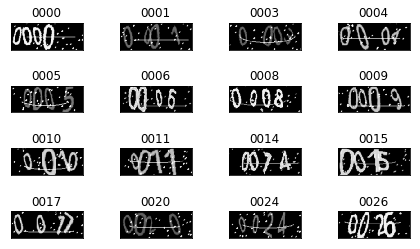

In [7]:
gray_images = rgb2gray(images)
print("gray_images.shape = {}".format(gray_images.shape))
print(gray_images[0])

show_images(gray_images, labels, gray_scale=True)

In [8]:
norm_images = gray_images / 255
print("norm_images.shape = {}".format(norm_images.shape))
print(norm_images[0])

norm_images.shape = (100, 60, 160)
[[0.9589451 0.9589451 0.9589451 ... 0.9589451 0.9589451 0.9589451]
 [0.9589451 0.9589451 0.9589451 ... 0.9589451 0.9589451 0.9589451]
 [0.9589451 0.9589451 0.9589451 ... 0.9589451 0.9589451 0.9589451]
 ...
 [0.9589451 0.9589451 0.9589451 ... 0.9589451 0.9589451 0.9589451]
 [0.9589451 0.9589451 0.9589451 ... 0.9589451 0.9589451 0.9589451]
 [0.9589451 0.9589451 0.9589451 ... 0.9589451 0.9589451 0.9589451]]


In [9]:
def fit_keras_channels(batch, rows=CAPTCHA_HEIGHT, cols=CAPTCHA_WIDTH):
    if K.image_data_format() == 'channels_first':
        batch = batch.reshape(batch.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        batch = batch.reshape(batch.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    return batch, input_shape

In [10]:
train_images, input_shape = fit_keras_channels(norm_images)
print("train_images.shape = {}".format(train_images.shape))
print("input_shape = {}".format(input_shape))

train_images.shape = (100, 60, 160, 1)
input_shape = (60, 160, 1)


In [11]:
def char2onehot(char, charset):
    onehot = np.zeros(len(charset))
    onehot[charset.index(char)] = 1
    return onehot

def text2vec(text, charset=NUMBER):
    vectors = [char2onehot(c, charset) for c in text]
    return np.array(vectors).flatten()

In [12]:
text2vec("9527")

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0.])

In [13]:
def vec2text(vector, onehot_length=4, charset=NUMBER):
    indexes = vector.reshape(onehot_length, -1).argmax(axis=1)
    text = [charset[i] for i in indexes]
    return "".join(text)

In [14]:
vector = np.array([[2.0792404e-10, 4.3756086e-07, 3.1140310e-10, 9.9823320e-01,
                    5.1135743e-15, 3.7417038e-05, 1.0556480e-08, 9.0933657e-13,
                    2.7573466e-07, 1.7286760e-03, 1.1030550e-07, 1.1852034e-07,
                    7.9457263e-10, 3.4533365e-09, 6.6065012e-14, 2.8996323e-05,
                    7.6345885e-13, 3.1817032e-16, 3.9540555e-05, 9.9993122e-01,
                    5.3814397e-13, 1.2061575e-10, 1.6408040e-03, 9.9833637e-01,
                    6.5149628e-08, 5.2246549e-12, 1.1365444e-08, 9.5700288e-12,
                    2.2725430e-05, 5.2195204e-10, 3.2457771e-13, 2.1413280e-07,
                    7.3547295e-14, 4.4094882e-06, 3.8390007e-07, 9.9230206e-01,
                    6.4467136e-03, 3.9224533e-11, 1.2461344e-03, 1.1253484e-07]],
                  dtype=np.float32)
vec2text(vector)

'3935'